In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time
import numpy as np
import pandas as pd
import pickle
import gc
# import re
# import collections
# import math
# from tqdm.notebook import tqdm
# from pytorch_memlab import MemReporter
# from torchinfo import summary
# ここから自作
import model
import result
import mode
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
torch.cuda.device_count()

2

In [3]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, data, target, transform=None):
        self.transform = transform
        self.data = data
        self.target = target
   
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        out_data = self.data[index]
        out_target = self.target[index]
        
        return out_data, out_target

In [4]:
# 時刻を表示してくれるようになるprint関数のwrapper
def datePrint(*args, **kwargs):
    from datetime import datetime
    print(datetime.now().strftime('[%Y/%m/%d %H:%M:%S] '), end="")
    print(*args, **kwargs)

In [5]:
def load_vocab(vocab_file):
    """Loads a vocabulary file into a dictionary."""
    vocab = collections.OrderedDict()
    with open(vocab_file, "r", encoding="utf-8") as reader:
        tokens = reader.readlines()
    for index, token in enumerate(tokens):
        token = token.rstrip("\n")
        vocab[token] = index
    return vocab

In [6]:
fea1 = torch.tensor(pickle.load(open("../data/rbert/feature/fea1.pkl","rb"))).float()
fea1 = fea1.permute(0, 2, 1)
acc1 = torch.tensor(np.loadtxt("../data/rbert/accessibility/acc1.csv" ,delimiter=',')).float()
fea2 = torch.tensor(pickle.load(open("../data/rbert/feature/fea2.pkl","rb"))).float()
fea2 = fea2.permute(0, 2, 1)
acc2 = torch.tensor(np.loadtxt("../data/rbert/accessibility/acc2.csv" ,delimiter=',')).float()
fea3 = torch.tensor(pickle.load(open("../data/rbert/feature/fea3.pkl","rb"))).float()
fea3 = fea3.permute(0, 2, 1)
acc3 = torch.tensor(np.loadtxt("../data/rbert/accessibility/acc3.csv" ,delimiter=',')).float()
fea4 = torch.tensor(pickle.load(open("../data/rbert/feature/fea4.pkl","rb"))).float()
fea4 = fea4.permute(0, 2, 1)
acc4 = torch.tensor(np.loadtxt("../data/rbert/accessibility/acc4.csv" ,delimiter=',')).float()
fea5 = torch.tensor(pickle.load(open("../data/rbert/feature/fea5.pkl","rb"))).float()
fea5 = fea5.permute(0, 2, 1)
acc5 = torch.tensor(np.loadtxt("../data/rbert/accessibility/acc5.csv" ,delimiter=',')).float()

fea6 = torch.tensor(pickle.load(open("../data/rbert/feature/fea6.pkl","rb"))).float()
fea6 = fea6.permute(0, 2, 1)
acc6 = torch.tensor(np.loadtxt("../data/rbert/accessibility/acc6.csv" ,delimiter=',')).float()
fea7 = torch.tensor(pickle.load(open("../data/rbert/feature/fea7.pkl","rb"))).float()
fea7 = fea7.permute(0, 2, 1)
acc7 = torch.tensor(np.loadtxt("../data/rbert/accessibility/acc7.csv" ,delimiter=',')).float()
fea8 = torch.tensor(pickle.load(open("../data/rbert/feature/fea8.pkl","rb"))).float()
fea8 = fea8.permute(0, 2, 1)
acc8 = torch.tensor(np.loadtxt("../data/rbert/accessibility/acc8.csv" ,delimiter=',')).float()
fea9 = torch.tensor(pickle.load(open("../data/rbert/feature/fea9.pkl","rb"))).float()
fea9 = fea9.permute(0, 2, 1)
acc9 = torch.tensor(np.loadtxt("../data/rbert/accessibility/acc9.csv" ,delimiter=',')).float()
fea10 = torch.tensor(pickle.load(open("../data/rbert/feature/fea10.pkl","rb"))).float()
fea10 = fea10.permute(0, 2, 1)
acc10 = torch.tensor(np.loadtxt("../data/rbert/accessibility/acc10.csv" ,delimiter=',')).float()

feature = torch.cat([fea1, fea2, fea3, fea4, fea5, fea6, fea7, fea8, fea9, fea10], dim=0)
accessibility= torch.cat([acc1, acc2, acc3, acc4, acc5, acc6, acc7, acc8, acc9, acc10], dim=0)
print(feature.shape)
print(accessibility.shape)
dataset = model.Dataset(feature, accessibility)

train_dataset, val_dataset = torch.utils.data.random_split(dataset, [80000, 20000])

del fea1, fea2, fea3, fea4, fea5, acc1, acc2, acc3, acc4, acc5, feature, accessibility
del fea6, fea7, fea8, fea9, fea10, acc6, acc7, acc8, acc9, acc10
gc.collect()

torch.Size([100000, 120, 440])
torch.Size([100000, 435])


0

In [7]:
# datePrint("loading pickle data")
# # input0 = torch.tensor(pickle.load(open("../data/r-make/maxspan100/input_new0.pkl","rb")).astype(np.float32))
# # target0 = torch.tensor(pickle.load(open("../data/r-make/maxspan100/target_new0.pkl","rb"))).float()
# # target0 = torch.flip(target0, dims=[1])
# # input1 = torch.tensor(pickle.load(open("../data/r-make/maxspan100/input_new1.pkl","rb")).astype(np.float32))
# # target1 = torch.tensor(pickle.load(open("../data/r-make/maxspan100/target_new1.pkl","rb"))).float()
# # target1 = torch.flip(target1, dims=[1])
# input2 = torch.tensor(pickle.load(open("../data/r-make/maxspan100/input_pro2.pkl","rb")))
# target2 = torch.tensor(pickle.load(open("../data/r-make/maxspan100/target_pro2.pkl","rb"))).float()
# target2 = torch.flip(target2, dims=[1])
# input3 = torch.tensor(pickle.load(open("../data/r-make/maxspan100/input_val2.pkl","rb")))
# target3 = torch.tensor(pickle.load(open("../data/r-make/maxspan100/target_val2.pkl","rb"))).float()
# target3 = torch.flip(target3, dims=[1])

# input_all = torch.cat([input2, input3], dim=0)
# target_all = torch.cat([target2, target3], dim=0)

# dataset = model.Dataset(input_all, target_all)
# train_dataset, val_dataset = torch.utils.data.random_split(dataset, [800000, 200000])

In [8]:
# criterion = MseCosLoss()
# loss = criterion(target3[:10], target2[:10])
# loss

In [9]:
# costom loss軍団
    
class CosineLoss(nn.Module):
    def __init__(self):
        super(CosineLoss, self).__init__()

    def forward(self, outputs, targets):
        return 1 - F.cosine_similarity(outputs, targets).mean()

class MseCosLoss(nn.Module):
    def __init__(self, r):
        super(MseCosLoss, self).__init__()
        self.r = r

    def forward(self, outputs, targets):
        mse = F.mse_loss(outputs, targets)
#         pw = F.pairwise_distance(outputs, targets).mean()
        cos = F.cosine_similarity(outputs, targets).mean()
        return mse + (1-cos) * self.r
    
class PairwiseLoss(nn.Module):
    def __init__(self):
        super(PairwiseLoss, self).__init__()

    def forward(self, outputs, targets):
        return F.pairwise_distance(outputs, targets).mean()

    
class HyperbolicLoss(nn.Module):
    def __init__(self):
        super(HyperbolicLoss, self).__init__()

    def forward(self, u, v, epsilon=1e-7):
        sqdist = torch.sum((u - v) ** 2, dim=-1)
        squnorm = torch.sum(u ** 2, dim=-1)
        sqvnorm = torch.sum(v ** 2, dim=-1)
        x = 1 + 2 * sqdist / ((1 - squnorm) * (1 - sqvnorm)) + epsilon
        z = torch.sqrt(x ** 2 - 1)
        return torch.sum(z)

# from geomstats.geometry.poincare_ball import PoincareBall
# class PoincareBallLoss(nn.Module):
#     def __init__(self):
#         super(PoincareBallLoss, self).__init__()
        
#     def forward(self, output, target):
#         output = output.cpu().detach().numpy()
#         target = target.cpu().detach().numpy()
#         return float(PoincareBall(dim=8).metric.dist(output[0], target[0]))


losses = [nn.MSELoss(), MseCosLoss(1)]
lrs = [1e-4, 5e-4, 1e-3]
# opts = [optim.Adam, optim.RMSprop, optim.Adamax]

In [10]:
class conv1DBatchNorm(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1):
        super(conv1DBatchNorm, self).__init__()
        self.conv = nn.Conv1d(in_channels, out_channels, kernel_size, stride, padding, dilation, groups, bias=False)
        self.batchnorm = nn.BatchNorm1d(out_channels)
        
    def forward(self, x):
        x = self.conv(x)
        output = self.batchnorm(x)

        return output

class conv1DBatchNormRelu(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1):
        super(conv1DBatchNormRelu, self).__init__()
        self.conv = nn.Conv1d(in_channels, out_channels, kernel_size, stride, padding, dilation, groups, bias=False)
        self.batchnorm = nn.BatchNorm1d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        
    def forward(self, x):
        x = self.conv(x)
        x = self.batchnorm(x)
        output = self.relu(x)

        return output
    
class conv1DBatchNormMish(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1):
        super(conv1DBatchNormMish, self).__init__()
        self.conv = nn.Conv1d(in_channels, out_channels, kernel_size, stride, padding, dilation, groups, bias=False)
        self.batchnorm = nn.BatchNorm1d(out_channels)
        self.mish = nn.Mish(inplace=True)
        
    def forward(self, x):
        x = self.conv(x)
        x = self.batchnorm(x)
        output = self.mish(x)

        return output
    
class scSE(nn.Module):
    def __init__(self, channels, reduction=4):
        super(scSE, self).__init__()
        self.gap = nn.AdaptiveAvgPool1d(1)
        self.fc1 = nn.Linear(channels, channels//reduction, bias=False)
        self.fc2 = nn.Linear(channels//reduction, channels, bias=False)
        
        self.conv = nn.Conv1d(channels, 1, kernel_size=1)

        self.sig = nn.Sigmoid()

    def forward(self, x):
        batch, channel, _ = x.size()
        c = self.gap(x).view(batch, channel)
        c = self.sig(self.fc2(F.relu(self.fc1(c)))).view(batch, channel, 1)
        c = x * c
        
        s = self.sig(self.conv(x))
        s = x * s
        return c + s


In [11]:
class ForRNABert(nn.Module):
    def __init__(self, num_layer=8, num_filters=120, kernel_sizes=5):
        super(ForRNABert, self).__init__()
        self.filter = num_filters

        self.convs = nn.ModuleList()
        self.convs.append(conv1DBatchNormMish(in_channels=num_filters, out_channels=num_filters,
                         kernel_size=kernel_sizes, padding=kernel_sizes//2, stride=1))
        self.convs.append(scSE(channels=num_filters))
        for i in range(num_layer):
            self.convs.append(conv1DBatchNormMish(in_channels=num_filters, out_channels=num_filters,
                                                    kernel_size=kernel_sizes, padding=(kernel_sizes//2)*1, dilation=1))
            self.convs.append(conv1DBatchNormRelu(in_channels=num_filters, out_channels=num_filters,
                                                    kernel_size=kernel_sizes, padding=(kernel_sizes//2)*3, dilation=3))
            self.convs.append(conv1DBatchNormRelu(in_channels=num_filters, out_channels=num_filters,
                                                    kernel_size=kernel_sizes, padding=(kernel_sizes//2)*1, dilation=1))
            self.convs.append(conv1DBatchNormRelu(in_channels=num_filters, out_channels=num_filters,
                                                    kernel_size=kernel_sizes, padding=(kernel_sizes//2)*5, dilation=5))


        self.convs.append(conv1DBatchNormMish(in_channels=num_filters, out_channels=num_filters, kernel_size=kernel_sizes, padding=kernel_sizes//2))
        self.convs.append(scSE(channels=num_filters))
        self.convs.append(conv1DBatchNorm(in_channels=num_filters, out_channels=1, kernel_size=6))

    def forward(self, x):
        for i, l in enumerate(self.convs):
            x = l(x)
            if type(x) is tuple:
                x = x[0]

        x = x.view(x.shape[0], -1)
        return x

In [12]:
class Variable(nn.Module):
    def __init__(self, emb_dim=128, num_layer=8, num_filters=128, kernel_sizes=5):
        super(Variable, self).__init__()
        self.filter = num_filters
        self.embedding = nn.Embedding(6, emb_dim)

        self.convs = nn.ModuleList()
        self.convs.append(conv1DBatchNormMish(in_channels=emb_dim, out_channels=num_filters,
                         kernel_size=kernel_sizes, padding=kernel_sizes//2, stride=1))
        self.convs.append(scSE(channels=num_filters))
        for i in range(num_layer):
            self.convs.append(conv1DBatchNormMish(in_channels=num_filters, out_channels=num_filters,
                                                    kernel_size=kernel_sizes, padding=(kernel_sizes//2)*1, dilation=1))
            self.convs.append(conv1DBatchNormRelu(in_channels=num_filters, out_channels=num_filters,
                                                    kernel_size=kernel_sizes, padding=(kernel_sizes//2)*3, dilation=3))
            self.convs.append(conv1DBatchNormRelu(in_channels=num_filters, out_channels=num_filters,
                                                    kernel_size=kernel_sizes, padding=(kernel_sizes//2)*1, dilation=1))
            self.convs.append(conv1DBatchNormRelu(in_channels=num_filters, out_channels=num_filters,
                                                    kernel_size=kernel_sizes, padding=(kernel_sizes//2)*5, dilation=5))


        self.convs.append(conv1DBatchNormMish(in_channels=num_filters, out_channels=num_filters, kernel_size=kernel_sizes, padding=kernel_sizes//2))
        self.convs.append(scSE(channels=num_filters))
        self.convs.append(conv1DBatchNorm(in_channels=num_filters, out_channels=1, kernel_size=5))

    def forward(self, x):
        x = self.embedding(x.long())
        x = torch.transpose(x, 1, 2)
        for i, l in enumerate(self.convs):
            x = l(x)
            if type(x) is tuple:
                x = x[0]

        x = x.view(x.shape[0], -1)
        return x

class Trans(nn.Module):
    def __init__(self):
        super(Trans, self).__init__()
        self.conv = conv1DBatchNorm(in_channels=1, out_channels=1, kernel_size=5)
#         self.transformer = nn.Transformer(d_model=508, nhead=4, batch_first=True)
        
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=508, nhead=4, batch_first=True)
        self.encoder = nn.TransformerEncoder(self.encoder_layer, num_layers=2)
        self.decoder_layer = nn.TransformerDecoderLayer(d_model=512, nhead=4, batch_first=True)
        self.decoder = nn.TransformerDecoder(self.decoder_layer, num_layers=6)

    def forward(self, data, target, phase):
        batch, length = data.shape
        data =  data.reshape(batch, -1, length) #(batch, emb=1, length=512)
        target =  target.reshape(batch, -1, length-4) #(batch, emb=1, length=508)
        
        if phase=='train':
            memory = self.conv(self.encoder(data))
            output = self.decoder(target, memory)
        else:
            output = self.conv(self.encoder(data))
        
        output = output.view(output.shape[0], -1)
        return output
    
class ETC(nn.Module):
    def __init__(self):
        super(ETC, self).__init__()
        self.embedding = nn.Embedding(6, 64)
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=512, nhead=8, batch_first=True)
        self.encoder = nn.TransformerEncoder(self.encoder_layer, num_layers=8)
        self.conv1 = conv1DBatchNormMish(in_channels=64, out_channels=8, kernel_size=3)
        self.conv2 = conv1DBatchNorm(in_channels=8, out_channels=1, kernel_size=3)

    def forward(self, data):
        data = self.embedding(data.long())
        data = torch.transpose(data, 1, 2)
        output = self.conv2(self.conv1(self.encoder(data)))
        
        output = output.view(output.shape[0], -1)
        return output

criterion: MSELoss()
Epoch 1/15
val Loss:11.3390 Timer:27.6393
Epoch 2/15
train Loss:9.9930 Timer:260.1672
val Loss:8.0554 Timer:24.3266
Epoch 3/15
train Loss:7.2690 Timer:252.5861
val Loss:6.9142 Timer:26.5371
Epoch 4/15
train Loss:5.3800 Timer:237.0348
val Loss:4.9301 Timer:24.5127
Epoch 5/15
train Loss:4.0018 Timer:503.8612
val Loss:3.5513 Timer:76.9013


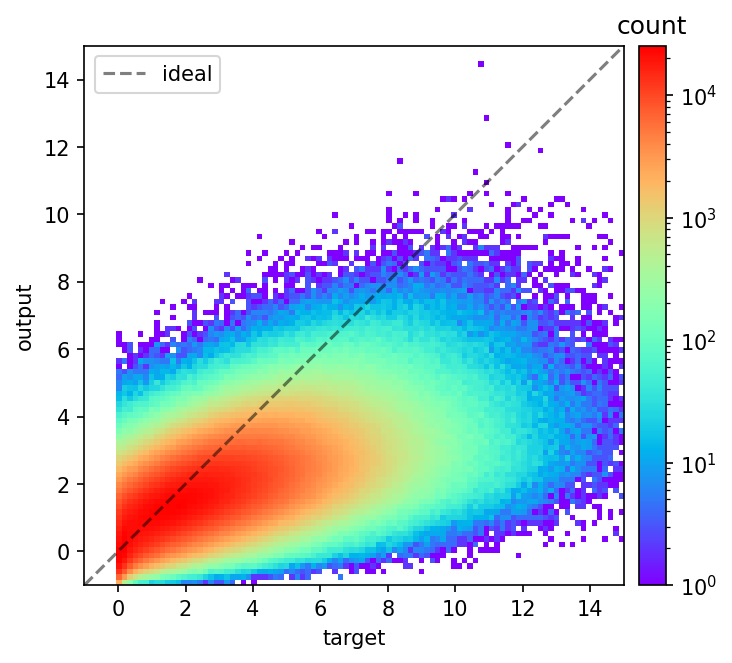

Epoch 6/15
train Loss:3.0884 Timer:468.9541
val Loss:2.6841 Timer:26.8172
Epoch 7/15
train Loss:2.6145 Timer:253.0628
val Loss:2.5702 Timer:28.1985
Epoch 8/15
train Loss:2.4648 Timer:251.2707
val Loss:2.4224 Timer:25.2570
Epoch 9/15
train Loss:2.4202 Timer:245.8300
val Loss:2.3855 Timer:25.5723
Epoch 10/15
train Loss:2.3858 Timer:247.8602
val Loss:2.3839 Timer:29.3403


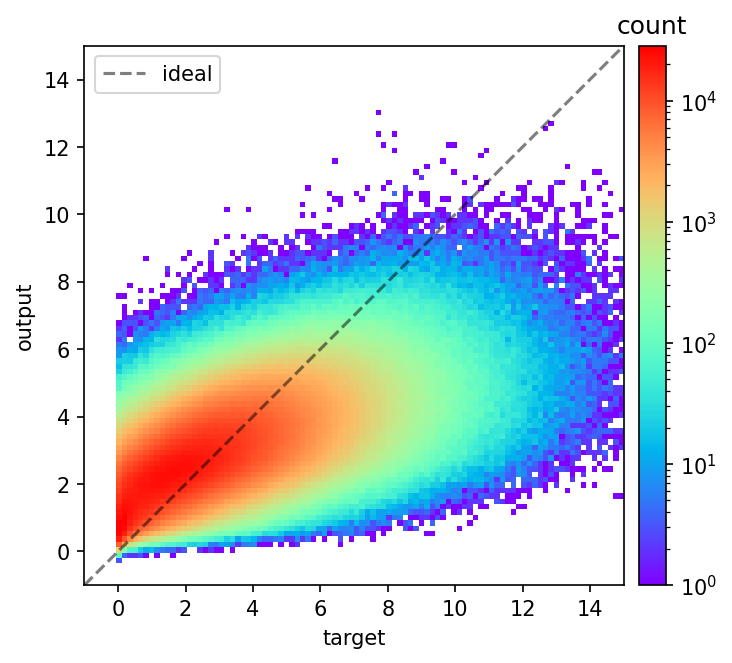

Epoch 11/15
train Loss:2.3522 Timer:263.7934
val Loss:2.4066 Timer:24.5053
Epoch 12/15
train Loss:2.3236 Timer:248.9145
val Loss:2.3442 Timer:25.5088
Epoch 13/15
train Loss:2.2944 Timer:249.0182
val Loss:2.3606 Timer:24.7824
Epoch 14/15
train Loss:2.2695 Timer:251.1554
val Loss:2.3320 Timer:25.9120
Epoch 15/15
train Loss:2.2451 Timer:252.7801
val Loss:2.3200 Timer:27.1662


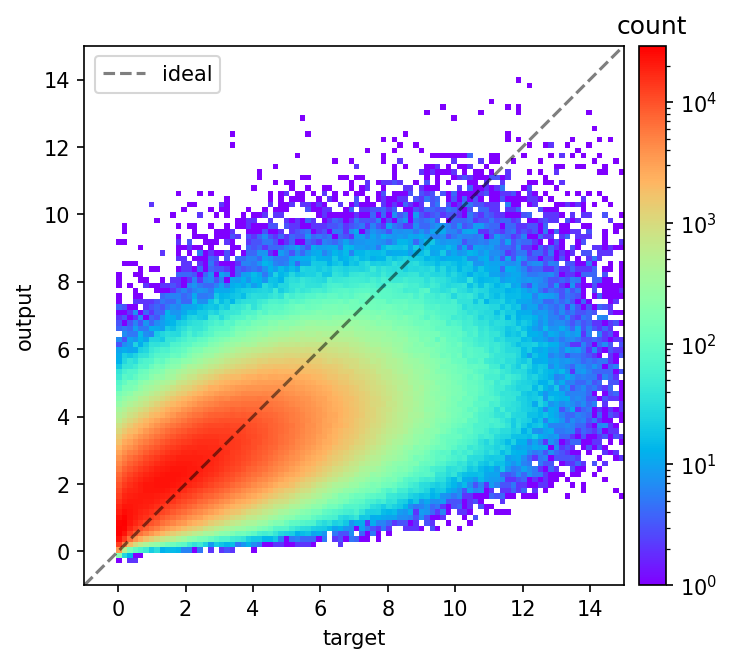

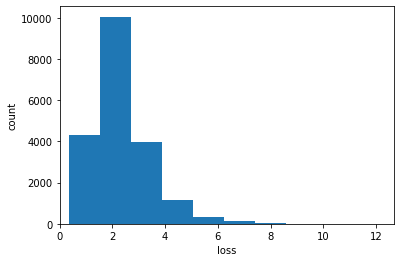

2.3200243


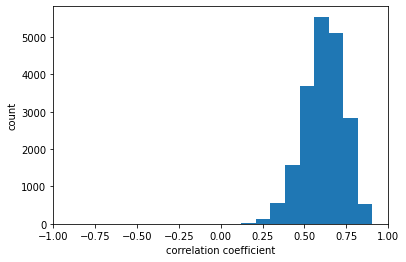

0.6149746211662782
criterion: MSELoss()
Epoch 1/15
val Loss:11.3390 Timer:24.6318
Epoch 2/15
train Loss:7.0728 Timer:234.4133
val Loss:4.1325 Timer:26.5194
Epoch 3/15
train Loss:2.9404 Timer:240.3943
val Loss:2.6627 Timer:25.6668
Epoch 4/15
train Loss:2.5735 Timer:513.6877
val Loss:2.4626 Timer:72.0462
Epoch 5/15
train Loss:2.4621 Timer:457.4982
val Loss:2.3991 Timer:27.1629


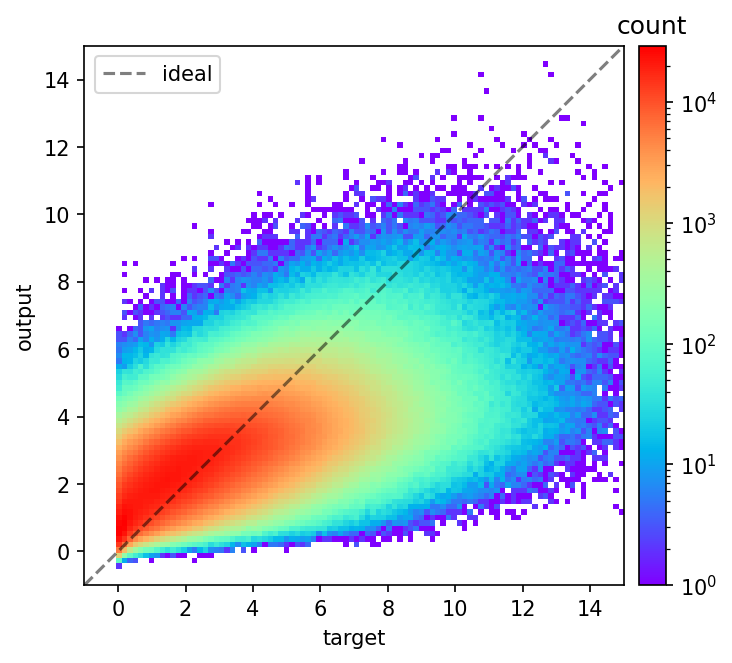

Epoch 6/15
train Loss:2.3810 Timer:250.4173
val Loss:2.3298 Timer:24.2927
Epoch 7/15
train Loss:2.3144 Timer:250.7403
val Loss:2.2627 Timer:25.0773
Epoch 8/15
train Loss:2.2607 Timer:246.7797
val Loss:2.2287 Timer:28.6723
Epoch 9/15
train Loss:2.2139 Timer:248.9772
val Loss:2.1855 Timer:23.0913
Epoch 10/15
train Loss:2.1735 Timer:263.6607
val Loss:2.1611 Timer:24.1998


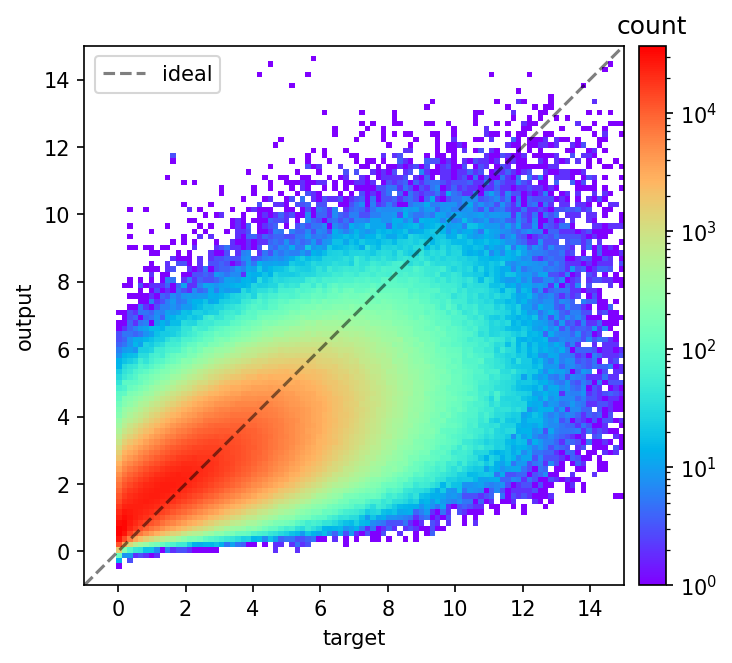

Epoch 11/15
train Loss:2.1375 Timer:257.3450
val Loss:2.1550 Timer:24.7796
Epoch 12/15
train Loss:2.1059 Timer:247.3355
val Loss:2.1279 Timer:25.0157
Epoch 13/15
train Loss:2.0769 Timer:228.0923
val Loss:2.1071 Timer:25.0095
Epoch 14/15
train Loss:2.0524 Timer:247.6999
val Loss:2.1074 Timer:24.6536
Epoch 15/15
train Loss:2.0295 Timer:244.5465
val Loss:2.1056 Timer:26.0254


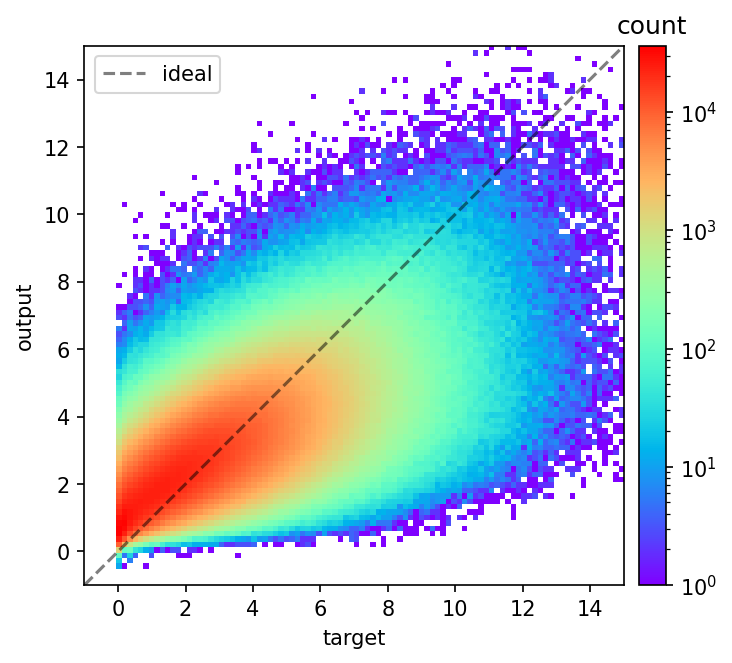

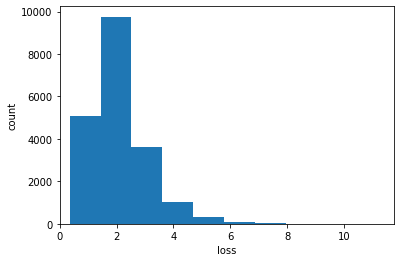

2.1055663


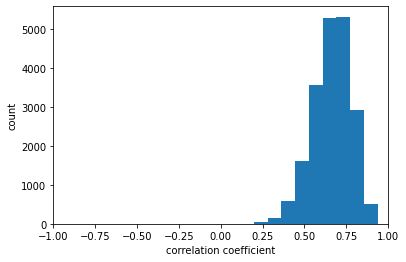

0.6635023079727788
criterion: MSELoss()
Epoch 1/15
val Loss:11.3390 Timer:23.9139
Epoch 2/15
train Loss:5.5199 Timer:246.8518
val Loss:2.7423 Timer:24.6323
Epoch 3/15
train Loss:2.6785 Timer:255.2026
val Loss:2.5742 Timer:24.9245
Epoch 4/15
train Loss:2.5384 Timer:249.8183
val Loss:2.4500 Timer:24.6744
Epoch 5/15
train Loss:2.4134 Timer:246.9049
val Loss:2.4192 Timer:24.9044


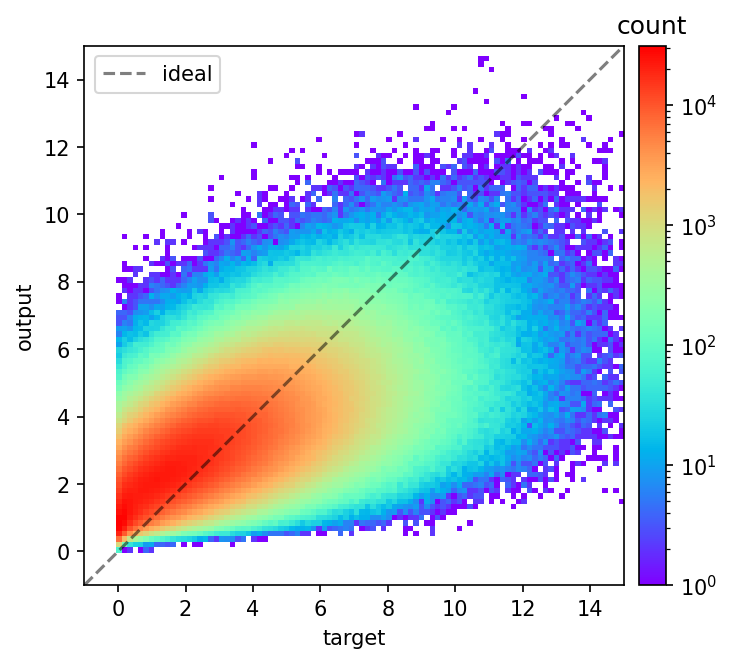

Epoch 6/15
train Loss:2.3186 Timer:264.3676
val Loss:2.2537 Timer:24.6335
Epoch 7/15
train Loss:2.2510 Timer:244.9089
val Loss:2.1946 Timer:25.1136
Epoch 8/15
train Loss:2.1947 Timer:247.6051
val Loss:2.1654 Timer:24.2049
Epoch 9/15
train Loss:2.1464 Timer:256.1392
val Loss:2.1376 Timer:26.2411
Epoch 10/15
train Loss:2.1056 Timer:262.2106
val Loss:2.1220 Timer:26.4440


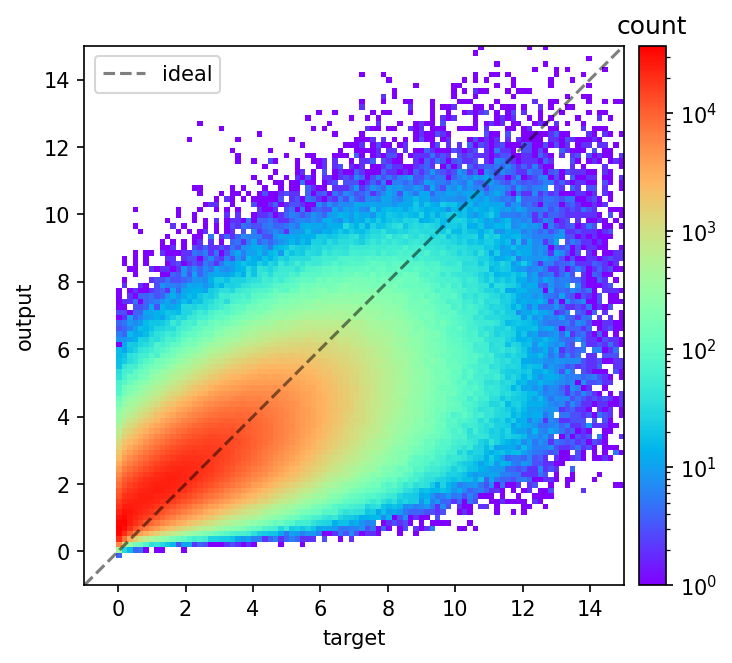

Epoch 11/15
train Loss:2.0712 Timer:254.4510
val Loss:2.0811 Timer:24.5370
Epoch 12/15
train Loss:2.0422 Timer:252.5780
val Loss:2.0642 Timer:25.5758
Epoch 13/15
train Loss:2.0155 Timer:258.1348
val Loss:2.0743 Timer:26.2160
Epoch 14/15
train Loss:1.9934 Timer:259.0723
val Loss:2.0636 Timer:25.5287
Epoch 15/15
train Loss:1.9711 Timer:245.4010
val Loss:2.0458 Timer:24.9526


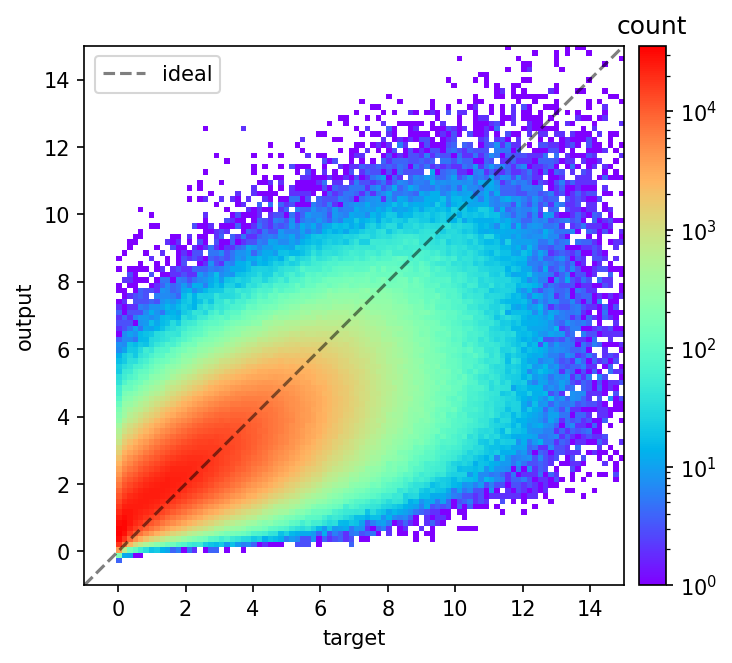

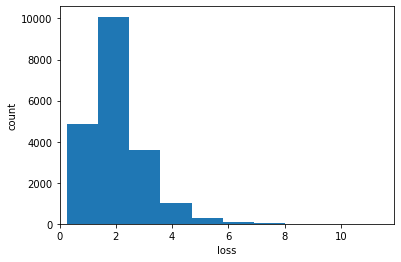

2.0457895


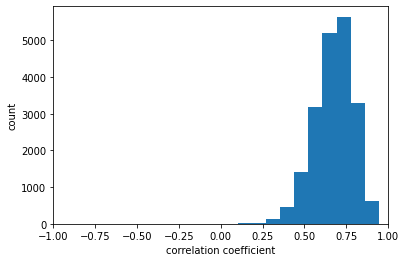

0.6747497407853988
criterion: MseCosLoss()
Epoch 1/15
val Loss:12.3390 Timer:26.4884
Epoch 2/15
train Loss:10.5848 Timer:249.9927
val Loss:8.7984 Timer:26.7229
Epoch 3/15
train Loss:7.6058 Timer:273.7475
val Loss:6.2693 Timer:26.5106
Epoch 4/15


In [ ]:
batch_size = 16
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=1)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=True, num_workers=1)
dataloaders_dict = {'train': train_dataloader, 'val': val_dataloader}

for loss in losses:
    for lr in lrs:
#         net = ETC().to(device)
#         net = Variable(num_layer=8, num_filters=128, kernel_sizes=5).to(device)
        net = ForRNABert().to(device)
        net = nn.DataParallel(net)
#         net.apply(model.weight_init) #重みの初期化適用
        #         print(summary(net, input_size=([batch_size, 512])))
        #         reporter = MemReporter(net)
        #         reporter.report()
        optimizer = torch.optim.RAdam(net.parameters(), lr=lr, weight_decay=1e-7)
        epochs = 15
        criterion = loss.to(device)
        print(f'criterion: {criterion}')
        #         # 学習途中データ
        #         checkpoint = torch.load('max_span100.pth')
        #         net.load_state_dict(checkpoint['model_state_dict'])
        #         optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        #         epochs = checkpoint['epoch']
        #         loss = checkpoint['loss']
#         scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
        train_loss_list, val_loss_list, target_all, output_all = mode.train(device, net, dataloaders_dict, criterion, optimizer, epochs)  
#         torch.save(net.state_dict(), 'tmp.pth')

    #     result.learning_curve(train_loss_list, val_loss_list, epochs[1:])
    #     result.plot_result(np.array(target_all, dtype=object).reshape(-1), np.array(output_all, dtype=object).reshape(-1))
        cor_list, loss_list = result.cal_indicators(target_all, output_all)
        result.loss_hist(loss_list)
        result.cor_hist(cor_list)
    #     loss_sort, cor_sort = result.sort_list(loss_list, cor_list)
    #     dic = {'best loss': loss_sort[0],  'worst loss': loss_sort[-1], '10th bad loss': loss_sort[-10],'100th bad loss': loss_sort[-100],
    #               'best cor': cor_sort[-1], 'worst cor': cor_sort[0], '10th bad cor': cor_sort[9],'100th bad cor': cor_sort[99]} 
    #     for k, v in dic.items():
    #         print(k)
    #         result.visible_one(target_all, output_all, data_all, loss_list, cor_list, idx=v)

In [ ]:
result.plot_result(np.array(target_all, dtype=object).reshape(-1), np.array(output_all, dtype=object).reshape(-1))
cor_list, loss_list = result.cal_indicators(target_all, output_all)
result.loss_hist(loss_list)
result.cor_hist(cor_list)
loss_sort, cor_sort = result.sort_list(loss_list, cor_list)
dic = {'best loss': loss_sort[0],  'worst loss': loss_sort[-100], 'best cor': cor_sort[-1], 'worst cor': cor_sort[100]} 
for k, v in dic.items():
    print(k)
    result.visible_one(target_all, output_all, data_all, loss_list, cor_list, idx=v)

In [ ]:
loss_target, loss_output, loss_data, cor_target, cor_output, cor_data = result.remake_bad(target_all, output_all, data_all, loss_sort, cor_sort, length=1000)
result.plot_result(np.array(loss_target, dtype=object).reshape(-1), np.array(loss_output, dtype=object).reshape(-1))
result.plot_result(np.array(cor_target, dtype=object).reshape(-1), np.array(cor_output, dtype=object).reshape(-1))

In [ ]:
def count_diff(data_all):
    diff_list = []
    for i in data_all:
        count_A, count_U, count_G, count_C = 0, 0, 0, 0
        count_A += np.count_nonzero(i==1)
        count_U += np.count_nonzero(i==2)
        count_G += np.count_nonzero(i==3)
        count_C += np.count_nonzero(i==4)
#         diff = abs(count_A-len(i)/4) + abs(count_U-len(i)/4) + abs(count_G-len(i)/4) + abs(count_C-len(i)/4)
        diff = count_G-len(i)/4
        diff_list.append(diff)

    return diff_list

_, loss_list = result.cal_indicators(loss_target, loss_output)
diff_list = count_diff(loss_data)
result.heat_scatter(diff_list, loss_list)

cor_list, _ = result.cal_indicators(cor_target, cor_output)
diff_list = count_diff(cor_data)
result.heat_scatter(diff_list, cor_list)

# diff_list = count_diff(data_all)
# result.heat_scatter(diff_list, loss_list)
# result.heat_scatter(diff_list, cor_list)

In [ ]:
diff_list = result.count_diff(data_all)
result.heat_scatter(diff_list, loss_list)
result.heat_scatter(diff_list, cor_list)

_, loss_bad = result.cal_indicators(loss_target, loss_output)
diff_list = result.count_diff(loss_data)
result.heat_scatter(diff_list, loss_bad)

cor_bad, _ = result.cal_indicators(cor_target, cor_output)
diff_list = result.count_diff(cor_data)
result.heat_scatter(diff_list, cor_bad)

In [ ]:
path = "../data/real_data/RF00156.fa"

start = time.time()
with open(path, mode = 'r', encoding = 'utf-8') as f:
    seq_file = f.read().splitlines()
indexes = [i for i, n in enumerate(seq_file) if n.startswith('>')]
name_list = []
seq_list = torch.empty(0, 256)

for i in range(len(indexes)-1):
    name_list.append(seq_file[indexes[i]])
    seq = ''.join(seq_file[indexes[i]+1:indexes[i+1]]).replace('A', '1').replace('T', '2').replace('U', '2').replace('G', '3').replace('C', '4').replace('N', '0')
    seq = torch.Tensor(list(map(int, seq)))
    seq = torch.flip(seq, dims=[0])
    if (seq.shape[0]%256 != 0):
        seq = F.pad(seq, (0, 256-seq.shape[0]%256))
    seq = seq.unsqueeze(0)
    seq_list = torch.cat([seq_list, seq], dim=0)


# if (input_seq.shape[1]%256 != 0):
#     input_seq = F.pad(input_seq, (0, 256-input_seq.shape[1]%256))
# if (input_seq.shape[1]>256):
#     transform = True
#     division = (input_seq.shape[1])//128 - 1
#     input_init = input_seq
#     input_seq = input_seq.unfold(1, 256, 128).reshape(-1, 256)
# else:
#     transform = False
# datePrint(input_seq.shape)
# input_seq = input_seq.unsqueeze(0)
# datePrint(input_seq.shape)

seq_list = seq_list.unsqueeze(0)
net = model.Variable(num_layer=16, kernel_sizes=33, flag=False).to(device)
net.load_state_dict(torch.load('max_span20.pth'))
    
data_all, output_all = mode.predict(device, net, seq_list) 
# if (transform==True):
#     output_tmp = torch.tensor(output_all)
#     for n in range(division):
#         if (n==0):
#             output_all = output_tmp[n::division, :192]
#         elif (n==division-1):
#             output_all = torch.cat([output_all, output_tmp[n::division, 64:]], dim=1)
#         else:
#             output_all = torch.cat([output_all, output_tmp[n::division, 64:192]], dim=1)
    
#     data_all = input_init.numpy()
#     output_all = output_all.numpy()
    
np.savetxt('accessibility_output.txt', output_all, fmt='%.3f')
finish = time.time()
datePrint('予測時間', (finish-start))